In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import csv

dataset = pd.read_csv('/content/csv images.csv')
dataset.describe()

docker image    Tag  Created on    Size package manager   \
count            96      96          89     90               49   
unique           56      56          34     83                9   
top          fedora  latest          14  560MB              deb   
freq             24      40           9      2               24   

           base image # alternative base imgs  # tested dependences   \
count              45                       48                    48   
unique             37                        6                    35   
top      ubuntu:22.04                        0                   118   
freq                3                       33                     4   

       # valnarble dependeces   critical high   medium  low  # of downloads  \
count                        55       55     55      54   55             90   
unique                       28        7      8      10   27             24   
top                           0        0      0       0    0           100M   
freq                         13       38     37      32   16             23   

       secure  
count      56  
unique      6  
top       yes  
freq       35

In [ ]:
dataset.columns.values

array(['docker image', 'Tag ', 'Created on ', 'Size', 'package manager ',
       'base image', '# alternative base imgs ', '# tested dependences ',
       '# valnarble dependeces  ', 'critical', 'high  ', 'medium ',
       'low ', '# of downloads', 'secure'], dtype=object)

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
df1= dataset.copy()
df1= df1.apply(LabelEncoder().fit_transform)
df1.head()

docker image  Tag   Created on   Size  package manager   base image  \
0            21    43           18    65                 1           9   
1            47    43           23    44                 1          32   
2             7    43           23    47                 4          21   
3            15    43           25    16                 0          24   
4            50    43           25    80                 1          11   

   # alternative base imgs   # tested dependences   # valnarble dependeces    \
0                         5                     21                        27   
1                         1                     14                        21   
2                         1                      1                         1   
3                         1                     24                         1   
4                         5                     30                        14   

   critical  high    medium   low   # of downloads  secure  
0         1       3        0    25               3       2  
1         0       0        0    15               6       5  
2         0       0        0     0               6       4  
3         0       0        0     0              15       4  
4         5       3        4     7              18       2

In [ ]:
df1= df1.dropna()

In [ ]:
X = df1.drop(columns=['secure'])
X

docker image  Tag   Created on   Size  package manager   base image  \
0             21    43           18    65                 1           9   
1             47    43           23    44                 1          32   
2              7    43           23    47                 4          21   
3             15    43           25    16                 0          24   
4             50    43           25    80                 1          11   
..           ...   ...          ...   ...               ...         ...   
91            50    20            0    72                 9          37   
92             6    42            9    42                 9          37   
93             6    41            9    35                 9          37   
94             6    39            9    76                 9          37   
95            27    43           25    66                 9          37   

    # alternative base imgs   # tested dependences   # valnarble dependeces    \
0                          5                     21                        27   
1                          1                     14                        21   
2                          1                      1                         1   
3                          1                     24                         1   
4                          5                     30                        14   
..                       ...                    ...                       ...   
91                         6                     35                        24   
92                         6                     35                         6   
93                         6                     35                        16   
94                         6                     35                         8   
95                         6                     35                        28   

    critical  high    medium   low   # of downloads  
0          1       3        0    25               3  
1          0       0        0    15               6  
2          0       0        0     0               6  
3          0       0        0     0              15  
4          5       3        4     7              18  
..       ...     ...      ...   ...             ...  
91         0       3        0    17              18  
92         0       0        6    18               3  
93         0       0        8     9               3  
94         0       0        6     2               3  
95         7       8       10    27               3  

[96 rows x 14 columns]

In [ ]:
y = df1['secure']
y

0     2
1     5
2     4
3     4
4     2
     ..
91    2
92    4
93    2
94    1
95    0
Name: secure, Length: 96, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
rf.feature_importances_

array([0.02237659, 0.02343797, 0.03977295, 0.13470265, 0.00281138,
       0.00373461, 0.19165767, 0.01277765, 0.12383134, 0.12907894,
       0.11466159, 0.08286068, 0.10851964, 0.00977634])

<BarContainer object of 14 artists>

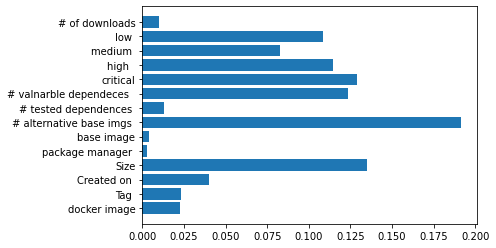

In [ ]:
plt.barh(X.columns.values, rf.feature_importances_)


Text(0.5, 0, 'Random Forest Feature Importance')

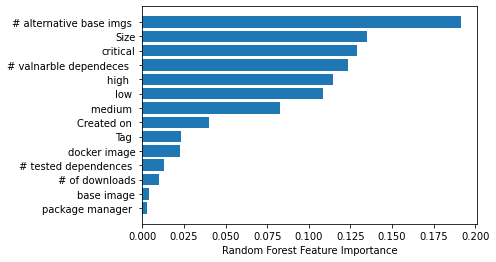

In [ ]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns.values[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# **Permutation Based Feature Importance (with scikit-learn)**
https://mljar.com/blog/feature-importance-in-random-forest/#:~:text=The%20feature%20importance%20can%20be%20plotted%20with%20more,feature%20importances%20with%20SHAP%20can%20be%20computationally%20expensive.




In [ ]:
perm_importance = permutation_importance(rf, X_test, y_test)


Text(0.5, 0, 'Permutation Importance')

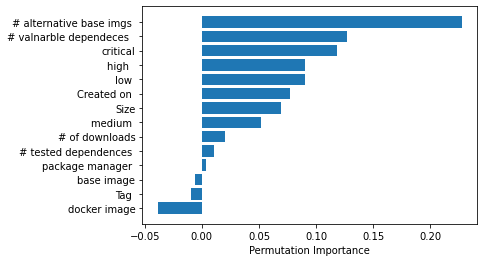

In [ ]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns.values[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")


# **Feature Importance Computed with SHAP Values**


In [ ]:
! pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 14.5 MB/s eta 0:00:00


In [ ]:
import shap 
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

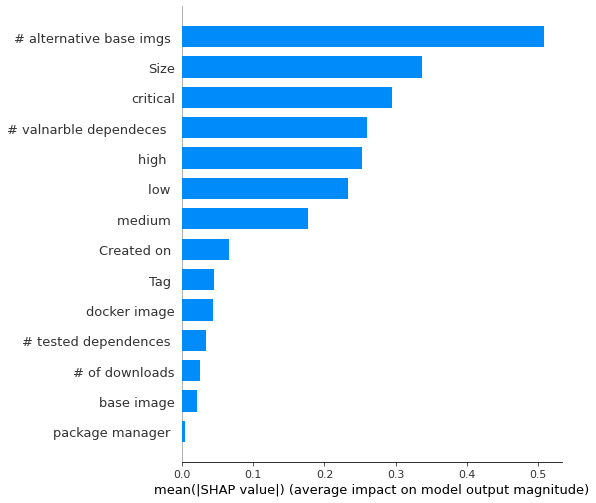

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")


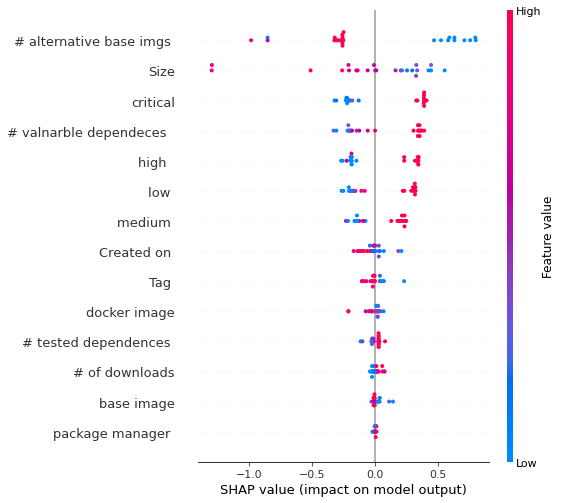

In [ ]:
shap.summary_plot(shap_values, X_test)


# using this website .... 
https://mljar.com/blog/feature-importance-in-random-forest/#:~:text=The%20feature%20importance%20can%20be%20plotted%20with%20more,feature%20importances%20with%20SHAP%20can%20be%20computationally%20expensive.